In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [12]:
df=pd.read_csv("economic_index.csv")

In [13]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [14]:
#drop unnecessary columns 
df.drop(columns=["Unnamed: 0", "year", "month"],axis=1, inplace=True)

In [15]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [16]:
#Check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

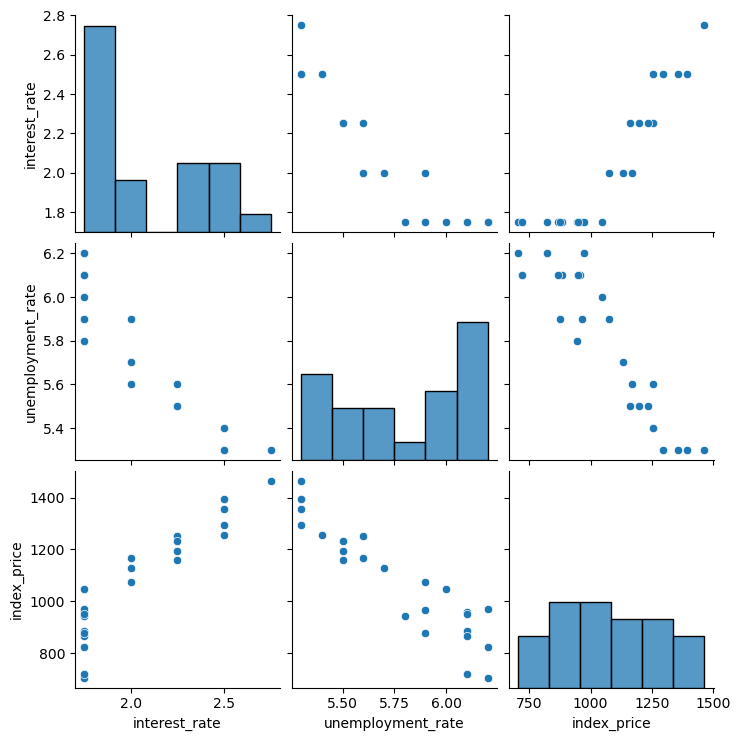

In [17]:
#Visualization
import seaborn as sns
sns.pairplot(df)

In [18]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.934288,0.918979
unemployment_rate,-0.934288,1.000000,-0.922338
index_price,0.918979,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

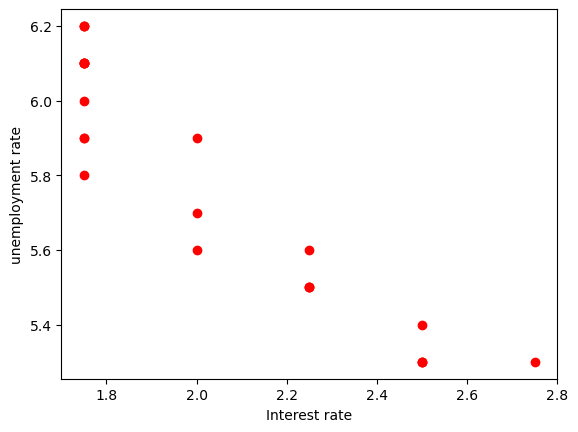

In [20]:
#Visualize the datapoints more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [21]:
# independent and ependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [22]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [23]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [25]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [26]:
import seaborn as sns

/Users/shivamdubey/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate', ylabel='index_price'>

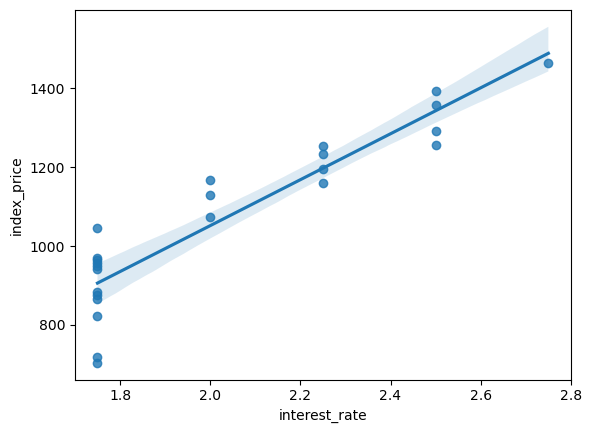

In [27]:
sns.regplot(df['interest_rate'],df['index_price'])

<AxesSubplot:xlabel='interest_rate', ylabel='unemployment_rate'>

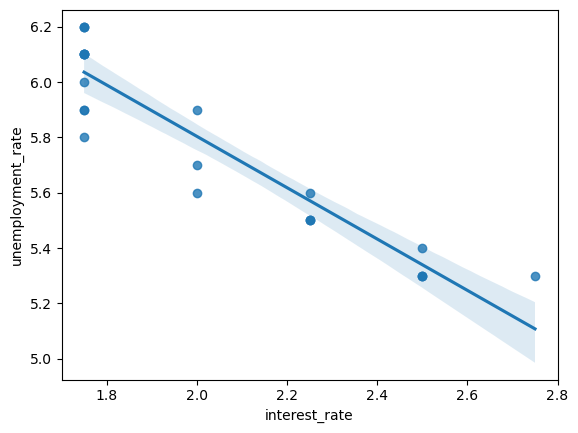

In [28]:
sns.regplot(df['interest_rate'],df['unemployment_rate'])

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [31]:
X_train

array([[-0.83240511,  0.37908503],
       [ 1.53337784, -1.48187786],
       [-0.83240511,  1.30956648],
       [ 0.74478352, -0.55139641],
       [ 1.53337784, -1.48187786],
       [-0.83240511,  0.68924552],
       [-0.83240511,  0.999406  ],
       [ 1.53337784, -1.48187786],
       [ 1.53337784, -1.17171738],
       [-0.83240511,  1.30956648],
       [-0.83240511,  0.999406  ],
       [-0.83240511,  0.37908503],
       [-0.83240511,  0.999406  ],
       [ 0.74478352, -0.8615569 ],
       [-0.0438108 , -0.24123593],
       [-0.83240511,  0.06892455],
       [-0.83240511,  0.999406  ],
       [ 0.74478352, -0.8615569 ]])

In [32]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [33]:
regression.fit(X_train, y_train)

LinearRegression()

In [56]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error', cv=3)
print(regression.coef_)

[  49.56793035 -150.12938193]


In [35]:
np.mean(validation_score)

-7449.793471844892

In [36]:
#Prediction
y_pred=regression.predict(X_test)

In [37]:
y_pred

array([1200.71201907,  805.11814394, 1365.2616504 ,  851.3269927 ,
        979.81065713, 1118.43720341])

In [38]:
# Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [39]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8582.137666537861
80.45956191374802
92.63982764738857


In [42]:
from sklearn.metrics import r2_score

In [45]:
score = r2_score(y_test,y_pred)
print(score)

0.745069875441971


In [46]:
# Display adjusted R-Squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5751164590699516

## Assumptions

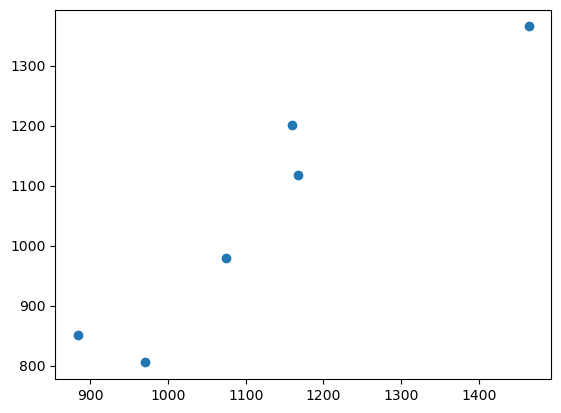

In [47]:
plt.scatter(y_test,y_pred)

In [48]:
residuals=y_test-y_pred
print(residuals)

8     -41.712019
16    165.881856
0      98.738350
18     32.673007
11     95.189343
9      48.562797
Name: index_price, dtype: float64


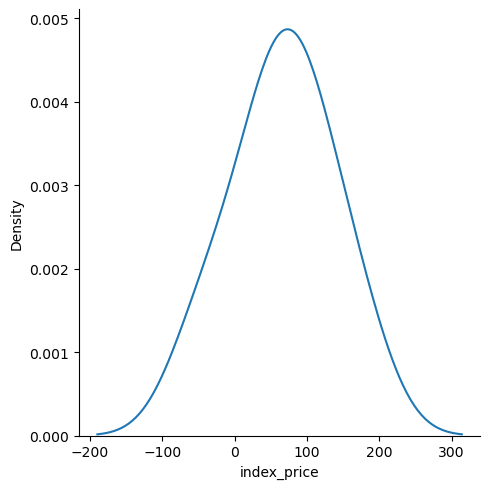

In [50]:
## PLot this residuals
sns.displot(residuals,kind='kde')

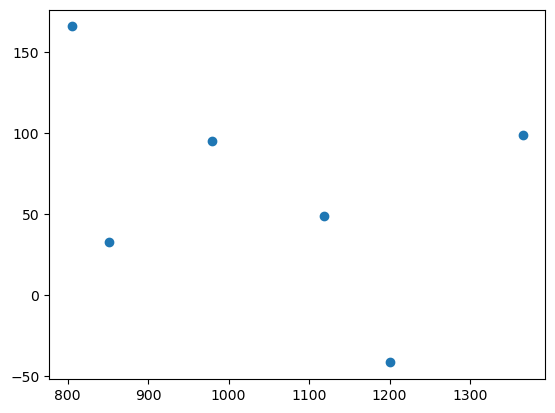

In [53]:
#scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

In [54]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train, X_train).fit()

In [55]:
model.summary()

/Users/shivamdubey/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.034
Model:                            OLS   Adj. R-squared (uncentered):             -0.087
Method:                 Least Squares   F-statistic:                             0.2806
Date:                Mon, 30 Dec 2024   Prob (F-statistic):                       0.759
Time:                        15:22:50   Log-Likelihood:                         -150.86
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            49.5679    830.751      0.060      0.953   -1711.545    1810.681
x2          -150.1294    830.751     -0.181      0.859   -1911.243    1610.984
==============================================================================
Omnibus:                        0.095   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.954   Jarque-Bera (JB):                0.316
Skew:                          -0.072   Prob(JB):                        0.854
Kurtosis:                       2.367   Cond. No.                         6.13
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""